# Additional Data Interpretation for Problem Statement

To better interpret individual variables from the Ames Housing dataset, this page analyzes the same data from the kaggle_modeling notebook, minus the columns created from PolynomialFeatures. 

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV

In [333]:
# Reading in transformed X data
data = pd.read_csv('./datasets/train_cleaned_x_vars.csv')

In [334]:
data['SalePrice'].describe()

count      2044.000000
mean     181119.769080
std       78868.566281
min       12789.000000
25%      129500.000000
50%      162000.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [335]:
data.columns

Index(['Unnamed: 0', 'MS SubClass', 'MS Zoning', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition', 'Bldg Type',
       'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'BsmtFin Type 1',
       'Total Bsmt SF', 'Heating QC', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Kitchen Qual', 'TotRms AbvGrd', 'Garage Area',
       'Paved Drive', 'Sale Type', 'SalePrice', 'tot_baths', 'tot_bed_bath',
       'tot_liv_area'],
      dtype='object')

In [336]:
data.drop(columns='Unnamed: 0', inplace=True)

In [337]:
# Creating a list of x variable columns with numerical values
num_vars = [col for col in data._get_numeric_data().columns]
num_vars.remove('MS SubClass') # MS Subclass is type int, but still categorical

In [338]:
num_vars

['Overall Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Garage Area',
 'SalePrice',
 'tot_baths',
 'tot_bed_bath',
 'tot_liv_area']

In [339]:
# Making a dataframe for all categorical columns

data_categ = data.drop(columns=num_vars)

In [340]:
# Listing out all the ames_categ variables
dummy_list = [x for x in data_categ.columns]

In [341]:
# Dummifying all categorical variables, including MS Subclass
data_categ = pd.get_dummies(data=data_categ, columns=dummy_list, drop_first=True)

In [342]:
# Combining my preprocessed numerical and categorical sub-datasets. Adding reset_index to prevent 
# adding of more rows
data_complete = pd.concat([data[num_vars], data_categ.reset_index()], axis=1)

In [343]:
data_complete['SalePrice'] = data['SalePrice']

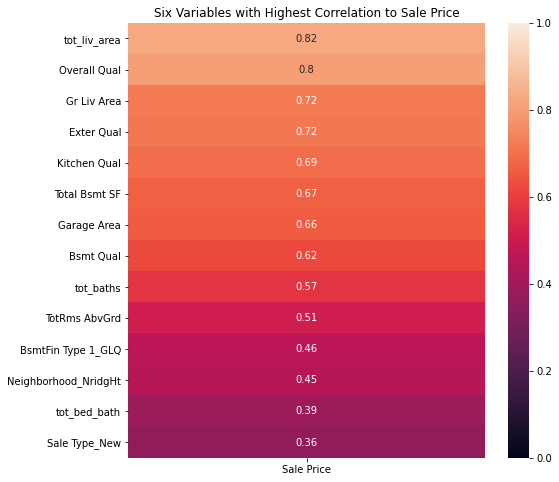

In [344]:
# This heat map shows the top 15 variables with the highest correlation with home sale price
plt.figure(figsize=(8, 8))
sns.heatmap(data_complete.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)[1:15], 
            annot=True, vmin=0, vmax=1,
           xticklabels= ['Sale Price'])
plt.title('Six Variables with Highest Correlation to Sale Price');

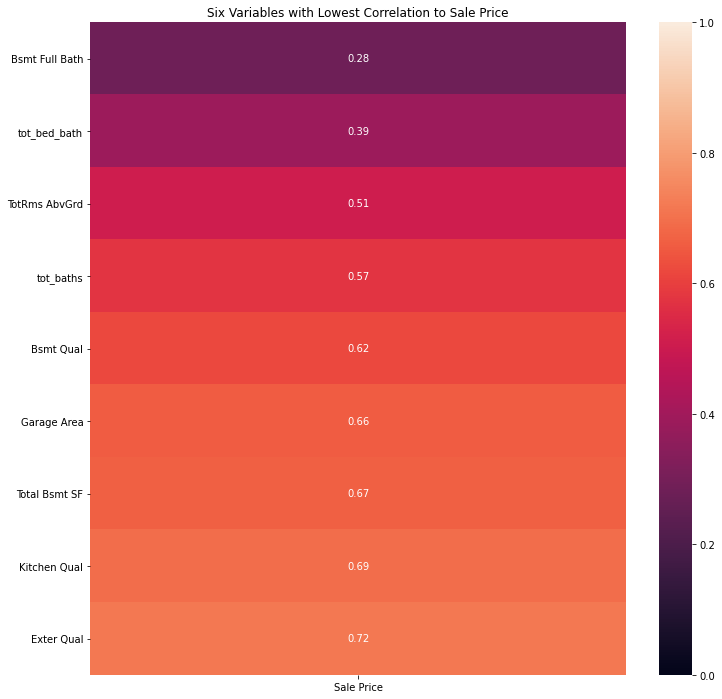

In [345]:
# This heat map shows the top 15 variables with the highest correlation with home sale price
plt.figure(figsize=(12, 12))
sns.heatmap(data_complete[num_vars].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=True)[1:10], 
            annot=True, vmin=0, vmax=1,
           xticklabels= ['Sale Price'])
plt.title('Six Variables with Lowest Correlation to Sale Price');

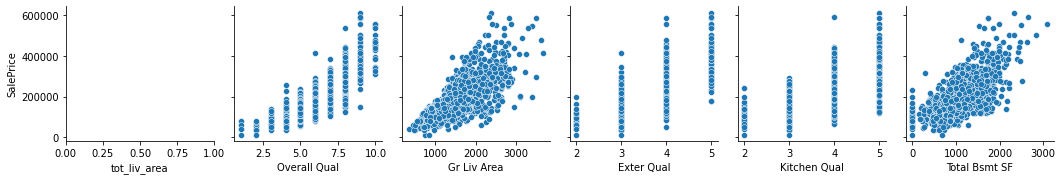

In [346]:
# Plotting out scatter plots for the six top ranked variables in terms of correlation with sale price
sns.pairplot(data, x_vars = ['tot_liv_area', 'Overall Qual', 'Gr Liv Area', 
                             'Exter Qual', 'Kitchen Qual', 'Total Bsmt SF', 
                             ], y_vars = ['SalePrice']);

/Users/gcano01/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


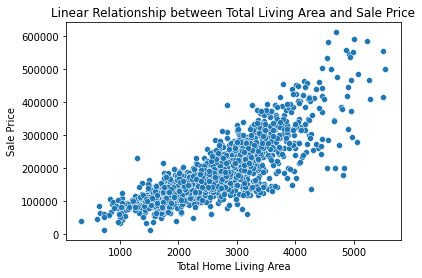

In [347]:
# Due to matplotlib glitch, the scatter plot for tot_liv_area vs sale price is blank in the above visualization,
# so it's been replotted here
sns.scatterplot(data['tot_liv_area'], data['SalePrice'])
plt.title('Linear Relationship between Total Living Area and Sale Price')
plt.xlabel('Total Home Living Area')
plt.ylabel('Sale Price');

/Users/gcano01/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


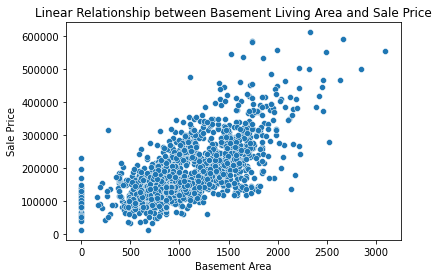

In [348]:
sns.scatterplot(data['Total Bsmt SF'], data['SalePrice'])
plt.title('Linear Relationship between Basement Living Area and Sale Price')
plt.xlabel('Basement Area')
plt.ylabel('Sale Price');

In [349]:
X = data_complete.drop(columns=['SalePrice'])
y = data_complete['SalePrice']

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [351]:
# Scaling training and testing data
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [352]:
# Cross val scores for X_train and y_train using ridge model
ridge_model = Ridge(alpha=10)
print(cross_val_score(estimator = ridge_model, X = Z_train, y = y_train).mean())
print(cross_val_score(estimator = ridge_model, X = Z_test, y = y_test).mean())

0.8781095038384896
0.8902162510346301


In [353]:
# Code taken from Regularization lesson. Scores are slightly improved using Ridge CV
# I'm using this as my 'problem statement model'

r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha
problem_statement_model = ridge_model.fit(Z_train, y_train)
print(f'Ideal ridge alpha to use: {problem_statement_model.alpha}')
print(f'Train score: {problem_statement_model.score(Z_train, y_train)}')
print(f'Test score: {problem_statement_model.score(Z_test, y_test)}')

Ideal ridge alpha to use: 10
Train score: 0.8996208933327224
Test score: 0.9060571400971308


In [354]:
y_hat_train = problem_statement_model.predict(Z_train)
y_hat_test = problem_statement_model.predict(Z_test)

Standard deviation of residuals: 24653.0


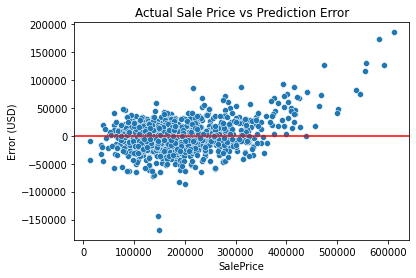

In [355]:
# Plotting Sale Price of the test data against the residuals of the test data (from train/test/split)
# As the sale price goes up, the y_hat values become more under-predicted. 
resids = y_train - y_hat_train
sns.scatterplot(x = y_train, y = resids)
plt.title('Actual Sale Price vs Prediction Error')
plt.ylabel('Error (USD)')
plt.axhline(0, color='r');

print("Standard deviation of residuals:", round(resids.std(), 0))

Standard deviation of residuals: 24878.0


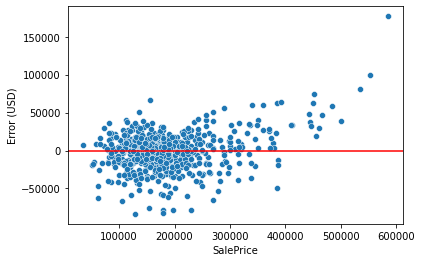

In [356]:
# Plotting Sale Price of the test data against the residuals of the test data (from train/test/split)
# As the sale price goes up, the y_hat values become more under-predicted. 
resids = y_test - y_hat_test
sns.scatterplot(x = y_test, y = resids)
plt.ylabel('Error (USD)')
plt.axhline(0, color='r');

print("Standard deviation of residuals:", round(resids.std(), 0))

/Users/gcano01/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


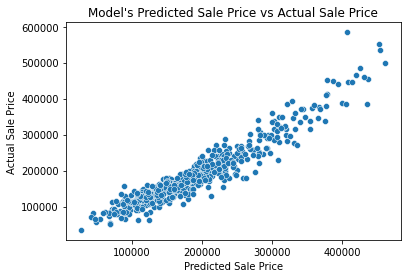

In [358]:
# sns.scatterplot(y_hat, y_test);
sns.scatterplot(y_hat_test, y_test, palette='GrBl')
plt.title('Model\'s Predicted Sale Price vs Actual Sale Price')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price');

In [359]:
# Code partially taken from the Model Workflow lesson
# Based off the problem statement model, the top three features that affect the home sale price most heavily are
# Above Ground Living Area, Overall Quality, Total Living Area
pd.DataFrame(list(zip(X.columns, problem_statement_model.coef_)), columns = ['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)[0:3]

,Feature,Coefficient
4,Gr Liv Area,16151.911555
0,Overall Qual,13932.241410
12,tot_liv_area,13698.265394
